## Time Series Plotting


#### Time series plotting
- we have used numeric variables,categorical variables( which fall into 'set of buckets' or 'intervals'
- we will explore time-series variables.


### Types of time series variables
- These are populated by values specific to a point in time.
- Time is linear and infinitely fine-grained.
- Time series values are kind of special case of interval variables.
- Ways to show dates in data set.
- **Strong case** dates act as an explicit index on your data set.
    * Dataset which is indexed by the date, data collected in 'period' of a day.
    * It is a convenient way for daily data, but a Period can technically be for any length of time.
    * Pandas provide a whole dedicated type, the pandas.Period dtype.
- **weak case** dates act as timestamps.
    * When an observation is occured.

In [8]:
%matplotlib inline
import pandas as pd
shelter_outcomes = pd.read_csv("Data/aac_shelter_outcomes.csv",
                               parse_dates=['date_of_birth',
                                            'datetime'])
shelter_outcomes.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07,2014-07-22 16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06,2013-11-07 11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31,2014-06-03 14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02,2014-06-15 15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07,2014-07-07 14:04:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,Unknown


In [6]:
shelter_outcomes = shelter_outcomes[['outcome_type', 'age_upon_outcome', 'datetime', 'animal_type', 'breed',
'color', 'sex_upon_outcome', 'date_of_birth']]
shelter_outcomes.head()

,outcome_type,age_upon_outcome,datetime,animal_type,breed,color,sex_upon_outcome,date_of_birth
0,Transfer,2 weeks,2014-07-22 16:04:00,Cat,Domestic Shorthair Mix,Orange Tabby,Intact Male,2014-07-07
1,Transfer,1 year,2013-11-07 11:47:00,Dog,Beagle Mix,White/Brown,Spayed Female,2012-11-06
2,Adoption,1 year,2014-06-03 14:20:00,Dog,Pit Bull,Blue/White,Neutered Male,2013-03-31
3,Transfer,9 years,2014-06-15 15:50:00,Dog,Miniature Schnauzer Mix,White,Neutered Male,2005-06-02
4,Euthanasia,5 months,2014-07-07 14:04:00,Other,Bat Mix,Brown,Unknown,2014-01-07


### Visualizing by grouping
- 'special case' of an interval variable.
- line plot which birth dates are the most common in the dataset.


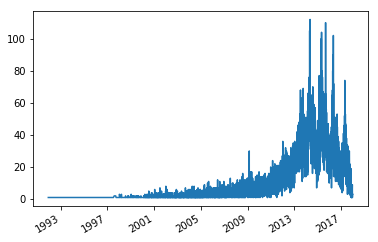

In [9]:
shelter_outcomes['date_of_birth'].value_counts().sort_values().plot.line()

- It seems like birth at 2015 was at peak but hard to tell for sure.
- Because data is noisy.
- Currently data is by day, but what if we globbed all the dates togather into years? This is known as ** resampling**.
- We can do this to tweak the dataset, generating a result that's aggregated by year.
- The method for doing this in pandas, resample, is pretty simple

In [13]:
shelter_outcomes['date_of_birth'].value_counts()

2014-05-05    112
2015-09-01    110
2014-04-21    105
2015-04-28    104
2016-05-01    102
2015-04-20    100
2015-04-27     90
2016-04-15     90
2015-04-19     90
2014-05-02     82
2015-05-11     80
2014-04-29     80
2016-04-10     80
2015-04-22     80
2015-04-26     77
2015-02-14     77
2016-04-22     76
2015-05-01     76
2015-05-25     76
2014-04-06     76
2015-04-03     76
2015-05-17     75
2014-03-25     74
2017-04-24     74
2015-05-12     73
2015-04-11     72
2014-03-26     72
2016-05-08     72
2014-04-02     72
2015-03-02     71
             ... 
2006-12-15      1
2007-09-15      1
2017-11-18      1
1999-10-09      1
2004-06-10      1
1999-01-09      1
2004-01-26      1
2003-11-19      1
2001-12-24      1
2000-10-15      1
2006-05-09      1
2001-01-30      1
2000-06-29      1
2001-06-19      1
2003-10-01      1
1999-08-12      1
2002-08-13      1
1999-08-13      1
1999-07-08      1
2005-08-25      1
2004-03-18      1
2000-09-05      1
2000-11-16      1
2007-03-29      1
2006-03-28

In [14]:
shelter_outcomes['date_of_birth'].value_counts().resample('Y')

DatetimeIndexResampler [freq=<YearEnd: month=12>, axis=0, closed=right, label=right, convention=start, base=0]

In [15]:
shelter_outcomes['date_of_birth'].value_counts().resample('Y').sum()

1991-12-31        1
1992-12-31        1
1993-12-31        1
1994-12-31        9
1995-12-31        7
1996-12-31       11
1997-12-31       25
1998-12-31       65
1999-12-31      113
2000-12-31      198
2001-12-31      282
2002-12-31      396
2003-12-31      395
2004-12-31      700
2005-12-31      826
2006-12-31     1083
2007-12-31     1397
2008-12-31     1593
2009-12-31     2089
2010-12-31     2551
2011-12-31     4004
2012-12-31     6282
2013-12-31    11314
2014-12-31    14213
2015-12-31    14159
2016-12-31    10484
2017-12-31     6057
Freq: A-DEC, Name: date_of_birth, dtype: int64

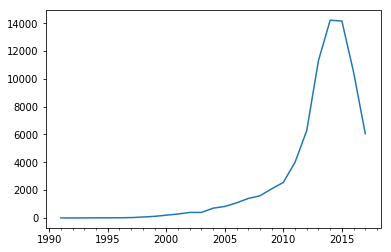

In [16]:
shelter_outcomes['date_of_birth'].value_counts().resample('Y').sum().plot.line()

- Much clear now 2014 and 2015 have almost equal presence in the dataset.

In [17]:
stocks = pd.read_csv("Data/prices.csv",parse_dates=['date'])
stocks.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [18]:
stocks = stocks[stocks['symbol'] == 'GOOG'].set_index('date')
stocks.head()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,GOOG,626.951088,626.751061,624.241073,629.511067,3927000.0
2010-01-05,GOOG,627.181073,623.991055,621.541045,627.841071,6031900.0
2010-01-06,GOOG,625.861078,608.261023,606.361042,625.861078,7987100.0
2010-01-07,GOOG,609.401025,594.101005,592.651008,610.001045,12876600.0
2010-01-08,GOOG,592.000997,602.021036,589.110988,603.251034,9483900.0


This dataset which is indexed by the date: the data being collected is being collected in the
"period" of a day. The values in the record provide information about that stock within that period.

In [20]:
stocks['volume'].resample('Y').mean()

date
2010-12-31    6.383553e+06
2011-12-31    6.179412e+06
2012-12-31    5.228172e+06
2013-12-31    4.190346e+06
2014-12-31    2.487038e+06
2015-12-31    2.069231e+06
2016-12-31    1.829845e+06
Freq: A-DEC, Name: volume, dtype: float64

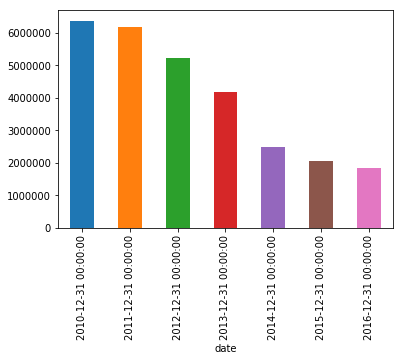

In [21]:
stocks['volume'].resample('Y').mean().plot.bar()

Most of the "new stuff" to using dates in your visualization comes down to a handful of new
data processing techniques.
Because timestampls are "just" interval variables, understanding date-
time data don’t require any newfangled visualization techniques!

In [22]:
crypto = pd.read_csv("Data/crypto-markets.csv")
crypto.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.500520e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.491160e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.597780e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.542820e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.292190e+09,0.3881,33.32


In [24]:
crypto = crypto[crypto['name'] == 'Bitcoin']
crypto.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.500520e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.491160e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.597780e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.542820e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.292190e+09,0.3881,33.32


In [26]:
type(crypto['date'][0])

str

In [27]:
crypto['date'] = pd.to_datetime(crypto['date'])
crypto.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.500520e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.491160e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.597780e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.542820e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.292190e+09,0.3881,33.32


In [28]:
type(crypto['date'][0])

pandas._libs.tslib.Timestamp

Try answering the following questions.
* Time-series variables are really a special case of what other type of variable?
* Why is resampling useful in a data visualization context?

Answers
* Time-series data is really a special case of interval data.
* Resampling is often useful in data visualization because it can help clean up and denoise our plots by aggregating on a different level. 

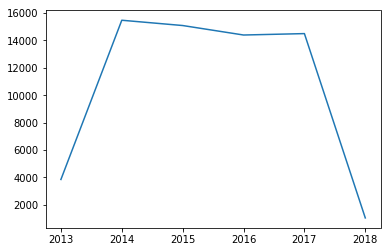

In [29]:
shelter_outcomes['datetime'].value_counts().resample('Y').count().plot.line()